# Data Analysis and Visualization
The goal of this jupyter notebook worksheet is to visualize and perform data analysis
## 1. Loading the data

In [3]:
# Load the data
# data is first downloweded into DATA_PATH from 
# http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

DATA_PATH = 'data'
FILE_NAME = 'train.csv'

# load_data: string, string --> pd.DataFrame
# load data from os.path.join(data_path, file_name) and
# return as pd.DataFrame
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    # load everything into data
    file_path = os.path.join(data_path, file_name)
    data = pd.read_csv(file_path)
    
    return data


In [4]:
data = load_data()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 2. Seperating the Data
### 2.1 Separating according to Numerical and Categorical
- numerical: int or float
- categorical: all numerical

In [6]:
# seperate_num_and_cat: pd.DataFrame --> pd.DataFrame, pd.DataFrame
# seperates data into one pd.DataFrame of np.float64 np.array
# and one pd.DataFrame of string
def seperate_num_and_cat(data):
    
    # numerical data type
    cont_type = [int, np.int64, float, np.float64]
    
    nums = []
    cats = []
    
    for col in data.columns:
        if data[col].dtype in cont_type:
            nums.append(col)
            #data[col].to_numeric()
        else:
            cats.append(col)

    return data[nums], data[cats]#.astype(str)

In [7]:
nums, cats = seperate_num_and_cat(load_data())

### 2.2 Seperate according to continous, discrete, and categorical
- continous: float, things that have continuous ouputs, feet, m^2 eg
- discrete: orderable data: number of of rooms, quality rating low to high, etc
- categorical: types

In [8]:
# seperate_num_and_cat: pd.DataFrame --> pd.DataFrame, pd.DataFrame
# seperates data into one pd.DataFrame of np.float64 np.array
# and one pd.DataFrame of string
def seperate_cont_discrete_cat(data):
    
    # continuous data type
    cont_type = [int, np.int64, float, np.float64]
    
    # discrete data colomns
    discrete_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 
                'YearBuilt', 'YearRemodAdd', 
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                'HalfBath', 'Bedroom', 'Kitchen', 
                'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                'BedroomAbvGr', 'KitchenAbvGr', 'MoSold', 'YrSold']
    
    conts = []
    discretes = []
    cats = []
    
    for col in data.columns:
        if col in discrete_cols:
            discretes.append(col)
        elif data[col].dtype in cont_type:
            conts.append(col)
        else:
            cats.append(col)

    return data[conts], data[discretes], data[cats]#.astype(str)

In [9]:
conts, discretes, cats2 = seperate_cont_discrete_cat(load_data())

### 2.3 Seperate By Cateory
The seperation scheme is as follows
1. Seperate according to closely related categories: e.g. garage size in car, garage size in m^2, garage ...
2. Then in each category, seperate by 2.1 or 2.2

In [10]:
def seperate_by_cat(data):
    cats = []
    cats.append(['LotFrontage', 'LotArea', 'LotShape', 
            'LotConfig'])
    cats.append(['Condition1', 'Condition2'])
    cats.append(['OverallQual', 'OverallCond'])
    cats.append(['YearBuilt', 'YearRemodAdd'])
    cats.append(['RoofStyle', 'RoofMatl'])
    cats.append(['Exterior1st', 'Exterior2nd'])
    cats.append(['MasVnrType', 'MasVnrArea'])
    cats.append(['ExterQual', 'ExterCond'])
    cats.append(['BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'])
    cats.append(['Heating', 'HeatingQC', 'CentralAir'])
    cats.append(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])
    cats.append(['HalfBath', 'KitchenQual'])
    cats.append(['Fireplaces', 'FireplaceQu'])
    cats.append(['GarageType', 'GarageYrBlt', 'GarageFinish', 
                 'GarageCars', 'GarageArea', 'GarageQual', 
                 'GarageCond', 'PavedDrive'])
    cats.append(['PoolArea', 'PoolQC'])
    cats.append(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])
    cats.append(['MoSold', 'YrSold'])
    
    left_over = []
    
    for col in data.columns:
        in_left_over = True
        
        for i in range(len(cats)):
            if col in cats[i]:
                in_left_over = False
                break
                
        if in_left_over:
            left_over.append(col)
    
    cats.append(left_over)
    
    ans = []
    for i in range(len(cats)):
        ans.append(data[cats[i]])
    
    return ans        
        
        

In [11]:
by_cat = seperate_by_cat(load_data())

### 2.4 Suffle the Data Columns according to covariance

In [12]:
def encode(cats):
    encoders = {}
    encoded_cats = {}
    
    for cat in cats.columns:
        encoder = LabelEncoder()
        encoded_cats[cat] = encoder.fit_transform(cats[cat]) # won't work if cats has missing value
        encoders[cat] = encoder
    
    return pd.DataFrame(encoded_cats), encoders

def seperate_by_cov(data):
    nums, cats = seperate_num_and_cat(data)
    
    # fill nan
    cats = cats.fillna('nan').astype(str)
    nums = nums.fillna(nums.mean())
    
    encoded_cats, encoders  = encode(cats) # won't work if there is any nan

    # normalize (X-\mu)/\sigma
    from sklearn import preprocessing

    # standardise the means to 0 and standard error to 1
    for i in nums.columns[1:]:
        nums[i] = preprocessing.scale(nums[i].astype('float64'))
    
    for i in encoded_cats.columns[1:]:
        encoded_cats[i] = preprocessing.scale(encoded_cats[i].astype('float64'))
    
    X = pd.concat([nums, encoded_cats], axis=1, sort=False)
    
    
    
    cols = np.abs(X.cov()['SalePrice'])
    
    ind = cols.sort_values(ascending=False).index
    
    return data[ind]    
    
    

In [13]:
data_by_cov = seperate_by_cov(data)

In [14]:
data_by_cov.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,...,GarageCond,MiscVal,BsmtHalfBath,LandContour,BsmtCond,Utilities,BsmtFinSF2,BsmtFinType2,Condition2,GarageQual
0,1,208500,7,1710,2,Gd,548,Gd,856,856,...,TA,0,0,Lvl,TA,AllPub,0,Unf,Norm,TA
1,2,181500,6,1262,2,TA,460,Gd,1262,1262,...,TA,0,1,Lvl,TA,AllPub,0,Unf,Norm,TA
2,3,223500,7,1786,2,Gd,608,Gd,920,920,...,TA,0,0,Lvl,TA,AllPub,0,Unf,Norm,TA
3,4,140000,7,1717,3,TA,642,TA,756,961,...,TA,0,0,Lvl,Gd,AllPub,0,Unf,Norm,TA
4,5,250000,8,2198,3,Gd,836,Gd,1145,1145,...,TA,0,0,Lvl,TA,AllPub,0,Unf,Norm,TA


## 3 Fill missing Data and Encoding categorical data.

In [17]:
def pipe_line(data):
    nums, cats = seperate_num_and_cat(data)
    
    # encode categorical data
    encoded_cats, encoders = encode(cats) 
    
    # fill missing numerical data
    nums = nums.fillna(nums.mean())
    
    # normalize (X-\mu)/\sigma
    from sklearn import preprocessing

    # standardise the means to 0 and standard error to 1
    for i in nums.columns[1:]:
        nums[i] = preprocessing.scale(nums[i].astype('float64'))
    
    return nums, encoded_cats, encoders

#nums, cats, encoders = pipe_line(data)

## 2. Observations
- Many numerical data are filled with error: there is a large bar column of data sitting on top of x=0. If you read what the data represent, having x=0 is absurd. Probably the data is missing, eg. MasVnrArea, LowQualFinSF, 2ndFlrSF
- Many numerical data are only representative for x small (ie. has a good trend). e.g. LotArea
- Some numerical data should really be categorical: e.g. BsmtFullBath, BsmtHalfBath
- Some categorical data are very bad predictors, probably do more harm than good for our regressor: e.g. Utilities
- Seems to me gradient boost is very good here. Some numerical data has clear trend, but large variation. Gradient boost might capture those variation.

In [18]:
conts, discretes, cats2 = seperate_cont_discrete_cat(data_by_cov)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

def make_plots(data, nums):
    for cat in data:
        fig, ax = plt.subplots()
        x = data[cat]
        y = nums['SalePrice']
        ax.plot(x,y, 'o', alpha=0.1)
        ax.set_title(cat)
        fig

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


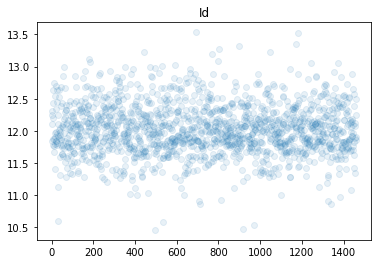

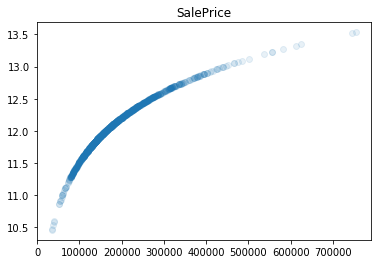

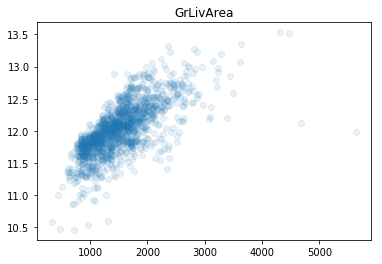

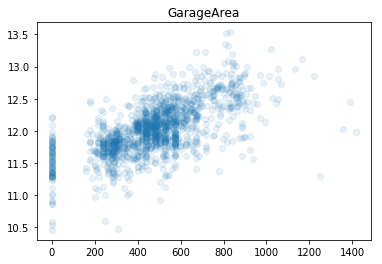

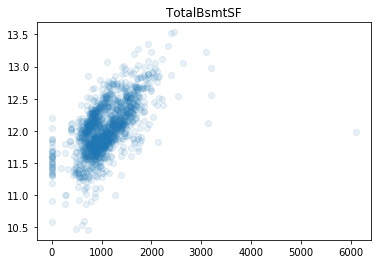

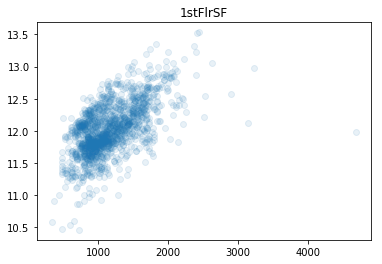

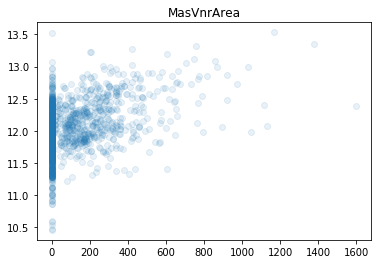

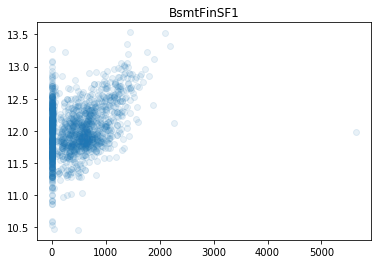

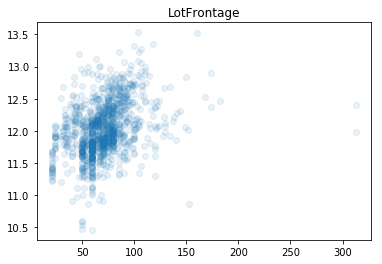

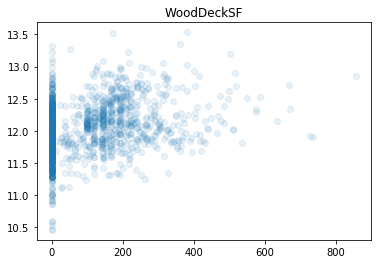

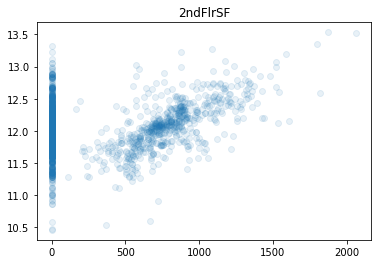

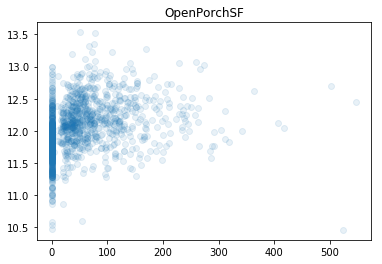

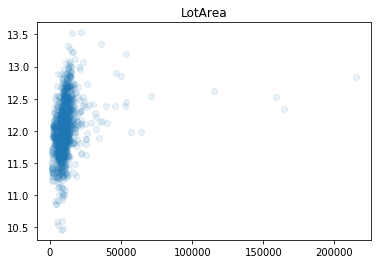

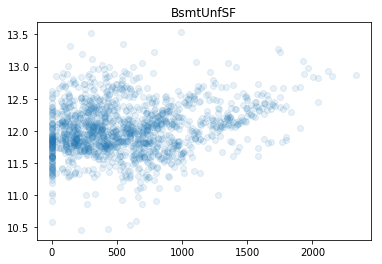

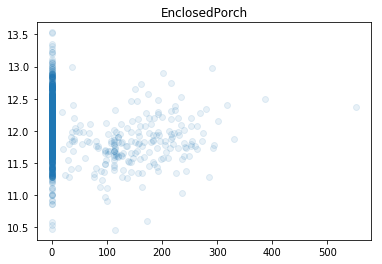

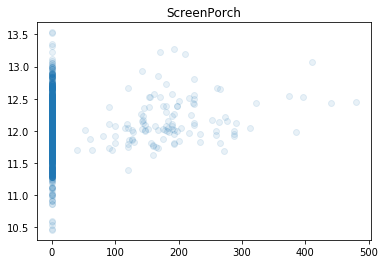

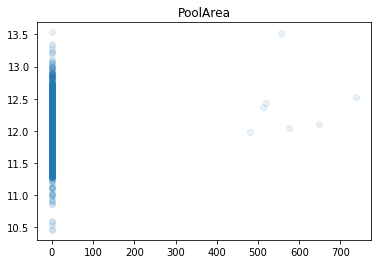

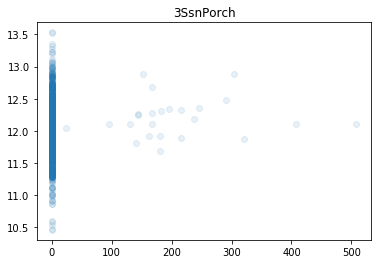

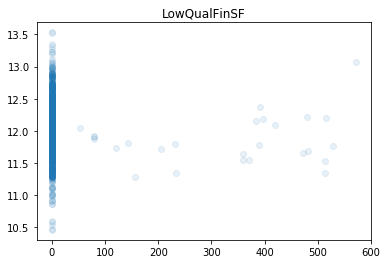

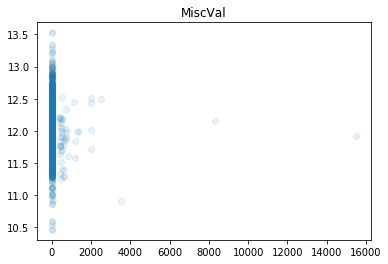

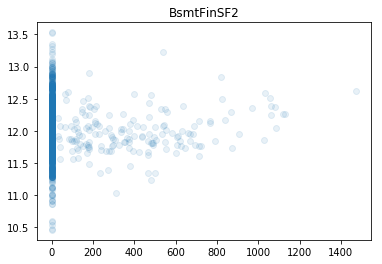

In [20]:
make_plots(conts, np.log(nums))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


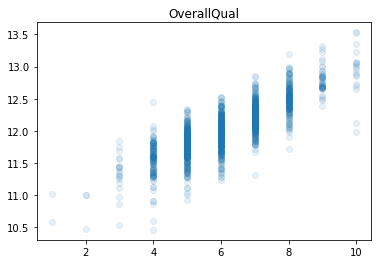

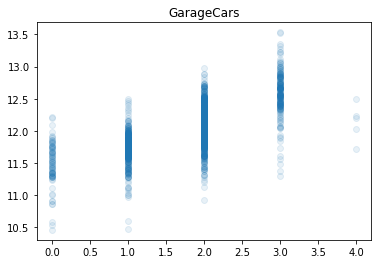

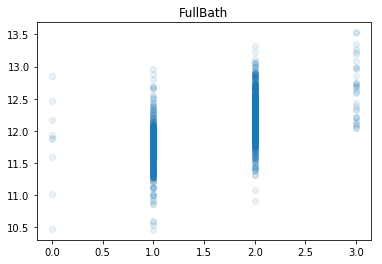

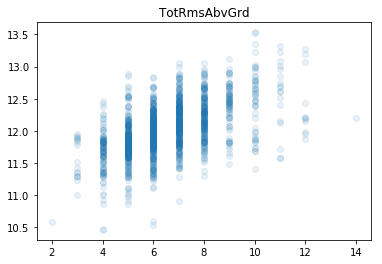

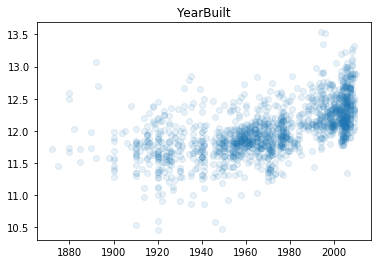

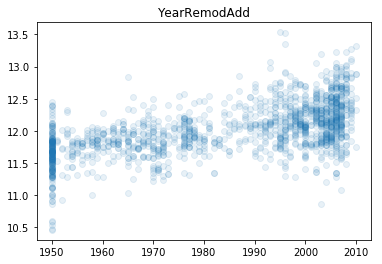

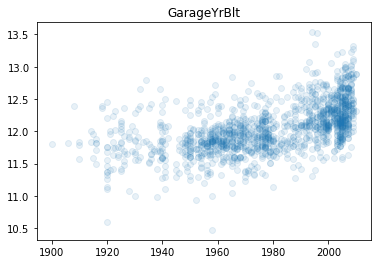

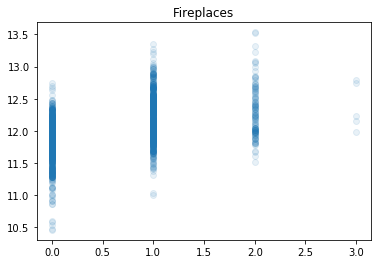

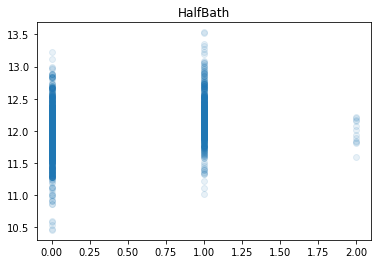

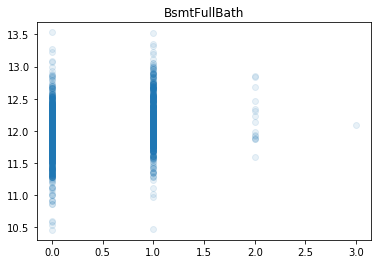

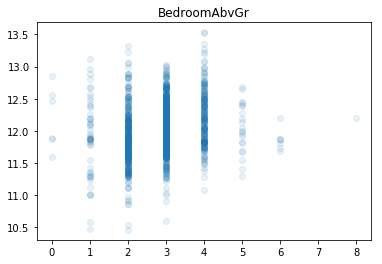

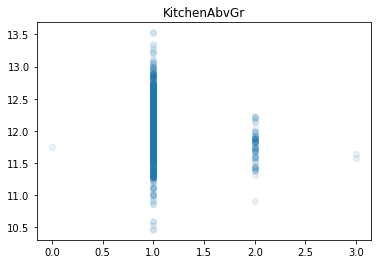

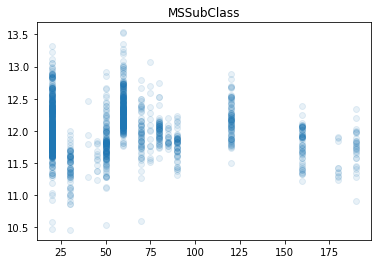

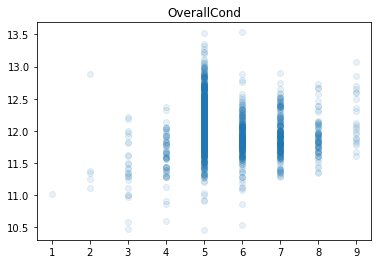

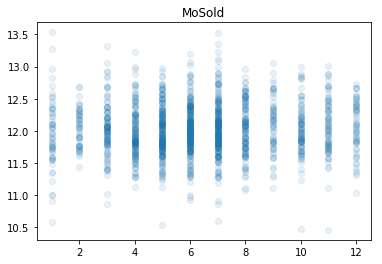

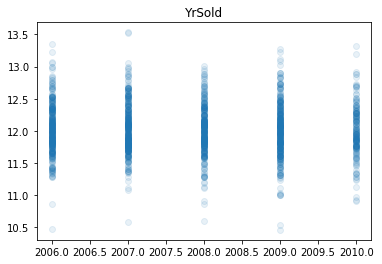

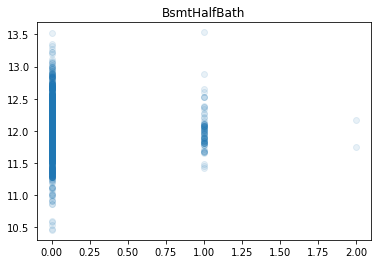

In [21]:
make_plots(discretes, np.log(nums))

## 3 Covariance
We compute the covariance of each attribute with respect to 'SalePrice':
- first renormalize all data to mean 0 and standard deviation 1 
- then we compute the covariance

### 3.1 Below is a list of numerical attributes ranked by correlation with 'SalePrice'

In [22]:
nums = nums.fillna(nums.mean())
    
# normalize (X-\mu)/\sigma
from sklearn import preprocessing

# standardise the means to 0 and standard error to 1
for i in nums.columns[1:]:
    nums[i] = preprocessing.scale(nums[i].astype('float64'))

In [24]:
x = np.abs(nums.cov()['SalePrice'])
x.sort_values(ascending=False)

Id               9.243474
SalePrice        1.000685
OverallQual      0.791524
GrLivArea        0.709110
GarageCars       0.640848
GarageArea       0.623859
TotalBsmtSF      0.614001
1stFlrSF         0.606267
FullBath         0.561048
TotRmsAbvGrd     0.534089
YearBuilt        0.523256
YearRemodAdd     0.507449
MasVnrArea       0.475567
GarageYrBlt      0.470500
Fireplaces       0.467249
BsmtFinSF1       0.386685
LotFrontage      0.335130
WoodDeckSF       0.324636
2ndFlrSF         0.319553
OpenPorchSF      0.316073
HalfBath         0.284302
LotArea          0.264024
BsmtFullBath     0.227278
BsmtUnfSF        0.214626
BedroomAbvGr     0.168328
KitchenAbvGr     0.136001
EnclosedPorch    0.128666
ScreenPorch      0.111523
PoolArea         0.092467
MSSubClass       0.084342
OverallCond      0.077909
MoSold           0.046464
3SsnPorch        0.044614
YrSold           0.028942
LowQualFinSF     0.025624
MiscVal          0.021204
BsmtHalfBath     0.016856
BsmtFinSF2       0.011386
Name: SalePr

### 3.2 Below is a list of categorical attributes ranked by correlation with 'SalePrice'

In [26]:
cats = cats.astype(str)
cats['SalePrice'] = nums['SalePrice']
y, _ = encode(cats)

In [27]:
# normalize (X-\mu)/\sigma
from sklearn import preprocessing

# standardise the means to 0 and standard error to 1
for i in y.columns[1:]:
    y[i] = preprocessing.scale(y[i].astype('float64'))

In [28]:
y = np.abs(y.cov()['SalePrice'])
y.sort_values(ascending=False)

SalePrice        1.000685
GarageFinish     0.616701
ExterQual        0.608148
BsmtQual         0.599430
KitchenQual      0.556084
GarageType       0.513548
FireplaceQu      0.467980
HeatingQC        0.449717
Foundation       0.433757
BsmtExposure     0.306594
CentralAir       0.298306
LotShape         0.295464
Electrical       0.277403
PavedDrive       0.269169
SaleCondition    0.236483
HouseStyle       0.225361
Neighborhood     0.189987
RoofStyle        0.169773
Alley            0.157111
Fence            0.157046
MSZoning         0.146390
Exterior2nd      0.137095
ExterCond        0.137036
Exterior1st      0.131561
Functional       0.130083
Heating          0.121006
Condition1       0.120964
BsmtFinType1     0.116254
RoofMatl         0.101473
BldgType         0.076491
MiscFeature      0.073200
LotConfig        0.069787
PoolQC           0.067215
LandSlope        0.057328
Street           0.043886
SaleType         0.034897
GarageCond       0.029211
LandContour      0.023524
GarageQual  